In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import warnings
import plotly.express as px
import string

from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from xgboost import XGBClassifier
import warnings
#import tensorflow as tf
#tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()
#tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.offline as offline
import plotly.graph_objs as go

df_test = pd.read_csv("C:/Users/caio.carneiro/Downloads/titanic/test.csv")
df_train = pd.read_csv("C:/Users/caio.carneiro/Downloads/titanic/train.csv")
df_data = pd.concat([df_train, df_test], sort=True).reset_index(drop=True)
dfs = [df_train, df_test]

In [8]:
df_data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [ ]:
#Missing Values

In [11]:
cols_with_missing = [col for col in df_data.columns if df_data[col].isnull().any()]
pd.isnull(df_data[cols_with_missing]).sum() #Acredito que aqui está mostrando a quantidade de missings em cada coluna

Age          263
Cabin       1014
Embarked       2
Fare           1
Survived     418
dtype: int64

In [12]:
#1.1 Age
#Para resolver o problema de valores ausentes para o campo Idade, procederemos da seguinte forma. 
#Como a PClass é a variável mais correlacionada com a Idade e Sobrevivência, agruparemos os passageiros de acordo com a classe 
#a que pertencem. O que faremos é substituir os valores ausentes pela mediana de cada grupo. Aliás, além disso, dentro de cada 
#uma das classes existentes faremos uma distinção de gênero. Fazemos isso porque, como veremos a seguir, a mediana de Idade 
#varia de acordo com o passageiro ser homem ou mulher.


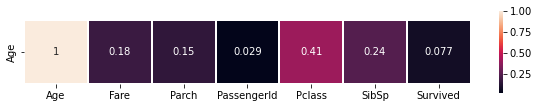

In [21]:
#Cria um mapa de calor
df_heatmap = pd.DataFrame(df_data.corr()['Age'].abs())
f,ax = plt.subplots(figsize = (10,1.5), facecolor = 'white')
sns.color_palette("rocket", as_cmap = True)
sns.heatmap(df_heatmap.transpose(), annot = True, square = True, linewidths = 1.5, cmap = 'rocket')

plt.show() #Tira o código que aparece na parte de cima do gráfico.


In [23]:
df_data

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
1305,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758
1306,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
1307,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309


In [30]:
mediana = df_data.groupby(['Sex', 'Pclass']).median()['Age']
for i in range(0, mediana.shape[0]):
    if i < 3:
        print('Mediana das idades para mulheres da classe {}: {}'.format(i + 1, mediana[i]))
    else:
        print('Mediana das idades para os homens da classe {}: {}'.format(i+1 - 3, mediana[i]))
            
df_data['Age'] = df_data.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x : x.fillna(x.median()))
print('Missing values for Age: {}'.format(df_data.Age.isnull().sum()))
        

Mediana das idades para mulheres da classe 1: 36.0
Mediana das idades para mulheres da classe 2: 28.0
Mediana das idades para mulheres da classe 3: 22.0
Mediana das idades para os homens da classe 1: 42.0
Mediana das idades para os homens da classe 2: 29.5
Mediana das idades para os homens da classe 3: 25.0
Missing values for Age: 0


In [ ]:
#1.2 Embarked
#Com relação ao Embarcado, substituiremos os dados ausentes pela moda, ou seja, o valor mais repetido
